In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('Downloads/Salary.xlsx')
data.head()

,Column1,YearsExperience,Salary
0,0,1.2,393440
1,1,1.4,462060
2,2,1.6,377320
3,3,2.1,435260
4,4,2.3,398920


In [3]:
data = data.drop(columns = 'Column1')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


### Exploratory Data Analysis

In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,3.000000e+01
mean,5.413333,7.600400e+05
std,2.837888,2.741443e+05
min,1.200000,3.773200e+05
25%,3.300000,5.672175e+05
50%,4.800000,6.523800e+05
75%,7.800000,1.005458e+06
max,10.600000,1.223920e+06


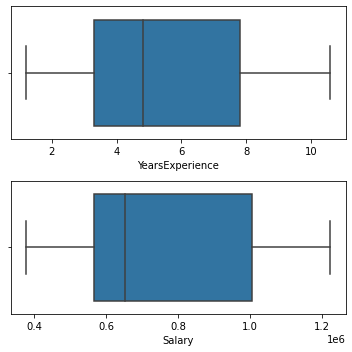

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(data['YearsExperience'], ax = axs[0])
plt2 = sns.boxplot(data['Salary'], ax = axs[1])
plt.tight_layout()

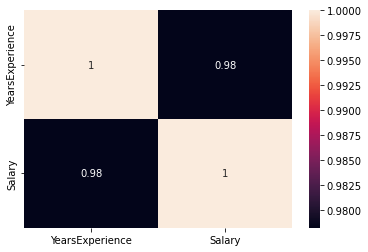

In [8]:
sns.heatmap(data.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

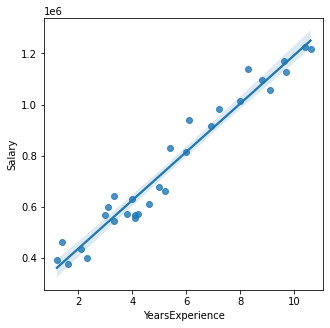

In [9]:
plt.figure(figsize=(5,5))
sns.regplot(x='YearsExperience',y='Salary',data=data)

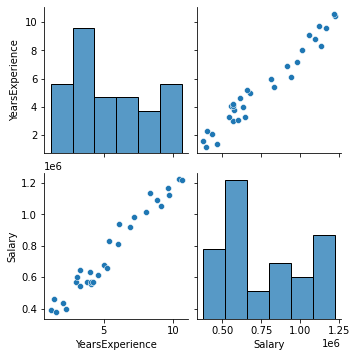

In [10]:
sns.pairplot(data)

In [11]:
x=data.iloc[:,:-1]
type(x)

pandas.core.frame.DataFrame

In [12]:
y=data.iloc[:,1]
type(y)

pandas.core.series.Series

### split the dataset into train and test dataset

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(9, 1)
(21,)
(9,)


### create and fit the model

In [47]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
#model evaluation
print(model.intercept_)

266880.45085283776


In [28]:
# Membuat dan menampilkan koefisien dari model
coeff_data = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])

In [29]:
coeff_data

,Coefficient
YearsExperience,93656.909585


In [17]:
y_predict=model.predict(x_test)
y_predict

array([ 575948.25248261,  482291.34289783, 1259643.69245149,
        650873.78015043, 1119158.32807432,  622776.707275  ,
        650873.78015043,  416731.50618848,  575948.25248261])

In [18]:
x_predict=model.predict(x_train)
x_predict

array([ 838187.59931999,  557216.87056565,  463559.96098087,
       1240912.31053454,  697702.23494282, 1091061.25519889,
        753896.38069369,  913113.12698781,  828821.90836151,
        735164.99877673, 1175352.47382519,  941210.19986324,
       1165986.78286671,  398000.12427153,  772627.76261064,
        547851.17960717,  641508.08919195, 1016135.72753107,
        660239.47110891,  379268.74235457, 1044232.8004065 ])

### create a dataframe for the actual & predicted

In [19]:
data1=pd.DataFrame({"Actual":y_test,"Predict":y_predict})
data1

,Actual,Predict
7,544460,5.759483e+05
4,398920,4.822913e+05
29,1218730,1.259644e+06
11,557950,6.508738e+05
25,1055830,1.119158e+06
9,571900,6.227767e+05
12,569580,6.508738e+05
2,377320,4.167315e+05
8,644460,5.759483e+05


### visualize the test and train data

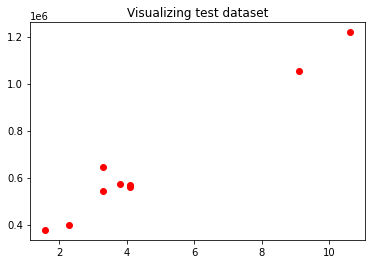

In [20]:
plt.scatter(x_test,y_test,color="r")
plt.title("Visualizing test dataset")
plt.show()

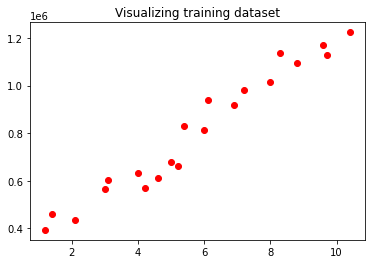

In [21]:
plt.scatter(x_train,y_train,color="r")
plt.title("Visualizing training dataset")
plt.show()

### check the Score

In [22]:
model.score(x_test,y_test)*100

94.2598153386151

In [23]:
model.score(x_train,y_train)*100

95.55025229507028

### calculate the accuracy of the model

In [24]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [25]:
# Print the statistics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 (Coefficient of Determination): {r2}")

Mean Absolute Error (MAE): 61346.570798665314
Mean Squared Error (MSE): 4189530171.9300056
R^2 (Coefficient of Determination): 0.9425981533861509


### plot result regression

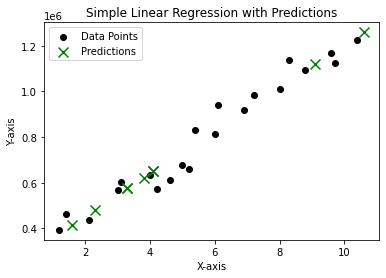

In [45]:
# Plot the regression line and predictions
plt.scatter(x_train, y_train, color='black', marker='o', label='Data Points')
# plt.plot(x_data_large, slope_large * x_data_large + intercept_large, color='blue', linewidth=2, label='Regression Line')
plt.scatter(x_new, y_pred, color='green', marker='x', s=100, label='Predictions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Linear Regression with Predictions')
plt.legend()
plt.show()

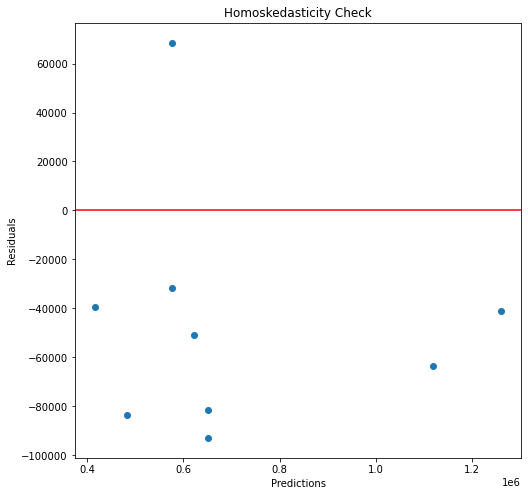

In [42]:
#uji asumsi homoskedastisitas
plt.figure(figsize=(8,8))
plt.scatter(predict, y_test - predict)
plt.title('Homoskedasticity Check')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

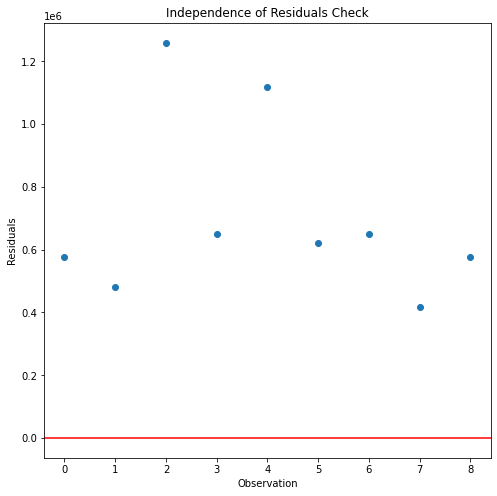

In [43]:
#uji asumsi independence of residuals
plt.figure(figsize=(8,8))
plt.plot(predict, marker='o', linestyle='None')
plt.title('Independence of Residuals Check')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

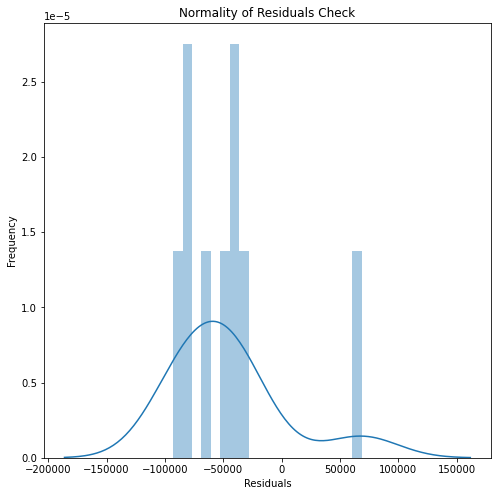

In [44]:
#uji asumsi normalitas residual
plt.figure(figsize=(8,8))
sns.distplot((y_test - predict), bins=20)
plt.title('Normality of Residuals Check')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

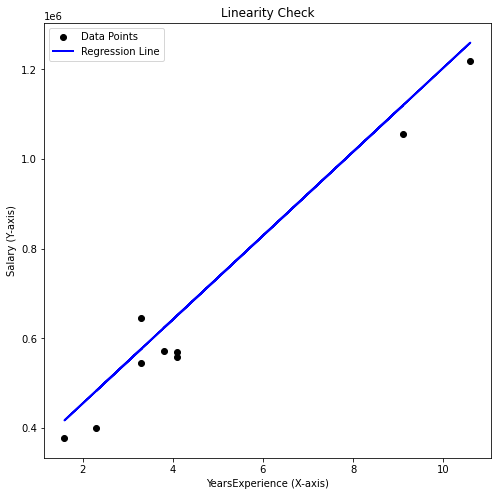

In [39]:
#uji asumsi linearity
plt.figure(figsize=(8,8))
plt.scatter(x_test['YearsExperience'], y_test, color='black', marker='o', label='Data Points')
plt.plot(x_test['YearsExperience'], predict, color='blue', linewidth=2, label='Regression Line')
plt.title('Linearity Check')
plt.xlabel('YearsExperience (X-axis)')
plt.ylabel('Salary (Y-axis)')
plt.legend()
plt.show()